# Forecasting the Sales of a Furniture Store

**We are using Superstore sales data for furniture sales between 2014 to 2017 and apply a simple model to forecast for 2018**

## Exploratory Data Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from warnings import filterwarnings

In [5]:
pd.options.display.max_columns = None
filterwarnings("ignore")

In [19]:
df = pd.read_csv("Project 13 - Time Series/Dataset/Super_Store.csv", encoding = "cp1252")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [20]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [22]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 
        'Customer ID', 'Customer Name', 'Segment', 'Country', 
        'City', 'State', 'Postal Code', 'Region', 'Product ID', 
        'Category', 'Sub-Category', 'Product Name', 'Quantity', 
        'Discount', 'Profit']
df.drop(cols, axis=1, inplace=True)

In [23]:
df

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840
...,...,...
2116,3/19/2015,383.4656
2117,12/5/2016,13.4000
2118,9/6/2015,85.9800
2119,1/21/2014,25.2480


In [25]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2015-10-11,957.5775
3,2014-06-09,48.8600
4,2014-06-09,1706.1840
...,...,...
2116,2015-03-19,383.4656
2117,2016-12-05,13.4000
2118,2015-09-06,85.9800
2119,2014-01-21,25.2480


In [26]:
final_df = df.groupby("Order Date").sum()
final_df

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [30]:
final_df = final_df.resample("MS").mean()
final_df

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049187
2014-06-01,695.059242
2014-07-01,601.169500
2014-08-01,457.521656
2014-09-01,992.353367


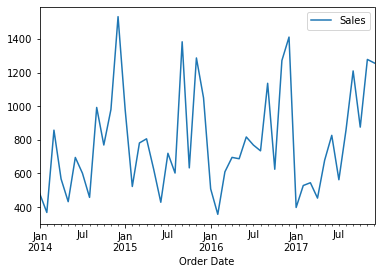

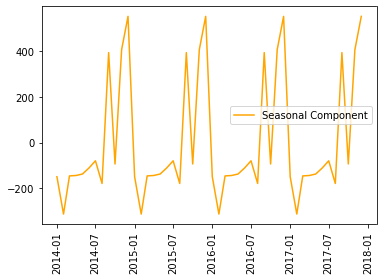

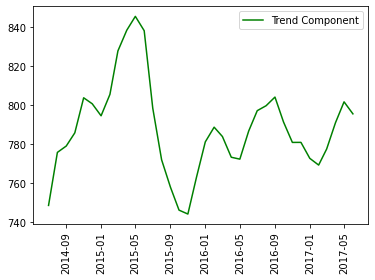

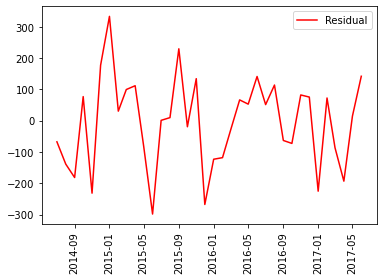

In [36]:
final_df.plot(label = "Actual Sales")
plt.legend()
plt.show()
decomp = seasonal_decompose(final_df)
plt.plot(decomp.seasonal, color = "orange", label = "Seasonal Component")
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.plot(decomp.trend, color = "green", label = "Trend Component")
plt.xticks(rotation = 90)
plt.legend()
plt.show()
plt.plot(decomp.resid, color = "red", label = "Residual")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [39]:
results = adfuller(final_df)
print("ADF- Statistics: ", results[0])
print("p-value: ", results[1])
print("Crucial Values -->")
for i,j in results[4].items():
    print("\t",i," : ", j)

ADF- Statistics:  -5.1910701873392675
p-value:  9.16875665566581e-06
Crucial Values -->
	 1%  :  -3.6209175221605827
	 5%  :  -2.9435394610388332
	 10%  :  -2.6104002410518627


## Building the ARIMA model

In [67]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
season_pdq= [(x[0], x[1], x[2], 12) for x in pdq]
for i in pdq:
    for j in season_pdq:
        model = sm.tsa.statespace.SARIMAX(final_df,order = i, seasonal_order=j,
                                         enforce_stationarity=False, enforce_invertibility=False)
        result = model.fit()
        print("ARIMA: {} X {} - AIC: {}".format(i,j,result.aic))

ARIMA: (0, 0, 0) X (0, 0, 0, 12) - AIC: 769.0817523205915
ARIMA: (0, 0, 0) X (0, 0, 1, 12) - AIC: 1422.4815810882067
ARIMA: (0, 0, 0) X (0, 1, 0, 12) - AIC: 477.7170130919702
ARIMA: (0, 0, 0) X (0, 1, 1, 12) - AIC: 302.27028997937924
ARIMA: (0, 0, 0) X (1, 0, 0, 12) - AIC: 497.23144334183365
ARIMA: (0, 0, 0) X (1, 0, 1, 12) - AIC: 1166.6738482969927
ARIMA: (0, 0, 0) X (1, 1, 0, 12) - AIC: 318.0047199116341
ARIMA: (0, 0, 0) X (1, 1, 1, 12) - AIC: 304.248828030178
ARIMA: (0, 0, 1) X (0, 0, 0, 12) - AIC: 720.9252270758102
ARIMA: (0, 0, 1) X (0, 0, 1, 12) - AIC: 2654.711093225486
ARIMA: (0, 0, 1) X (0, 1, 0, 12) - AIC: 466.5607429809146
ARIMA: (0, 0, 1) X (0, 1, 1, 12) - AIC: 291.62613896733
ARIMA: (0, 0, 1) X (1, 0, 0, 12) - AIC: 499.5601797461603
ARIMA: (0, 0, 1) X (1, 0, 1, 12) - AIC: 2438.1459574401474
ARIMA: (0, 0, 1) X (1, 1, 0, 12) - AIC: 319.9884876946869
ARIMA: (0, 0, 1) X (1, 1, 1, 12) - AIC: 291.87255765156067
ARIMA: (0, 1, 0) X (0, 0, 0, 12) - AIC: 677.894766843944
ARIMA: (0, 1

In [74]:
model = sm.tsa.statespace.SARIMAX(y,order = (1,1,1), seasonal_order= (0,1,1,12),
                                  enforce_invertibility=False)
mod_result = model.fit()
print(mod_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -238.297
Date:                            Thu, 21 Oct 2021   AIC                            484.594
Time:                                    04:02:11   BIC                            490.815
Sample:                                01-01-2014   HQIC                           486.741
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0836      0.243      0.344      0.731      -0.392       0.560
ma.L1         -1.0000   1485.565   

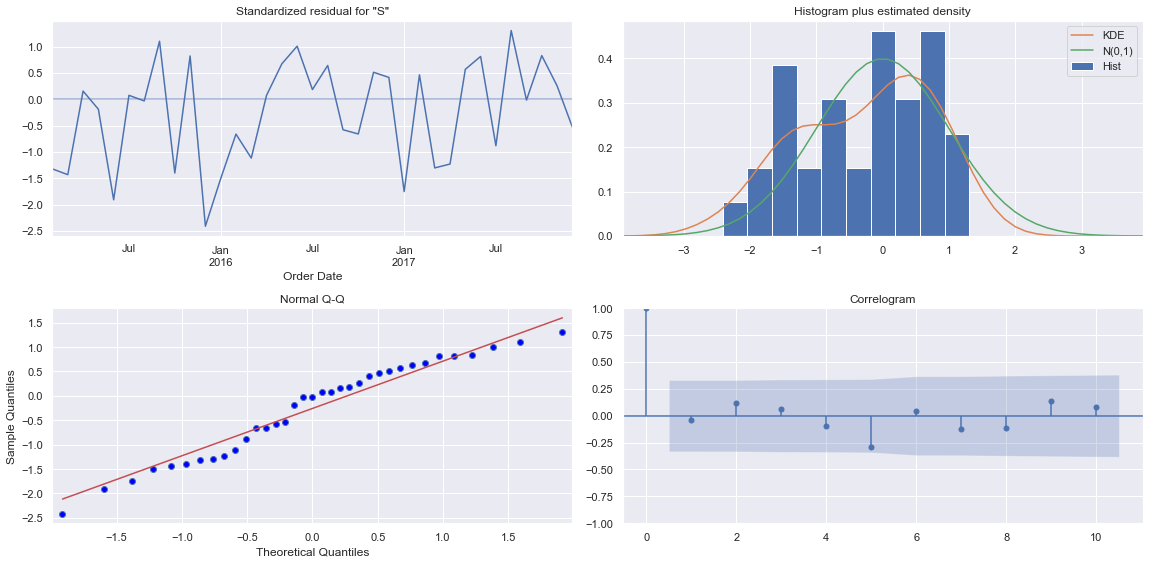

In [69]:
sns.set()
mod_result.plot_diagnostics(figsize = (16,8))
plt.tight_layout()
plt.show()

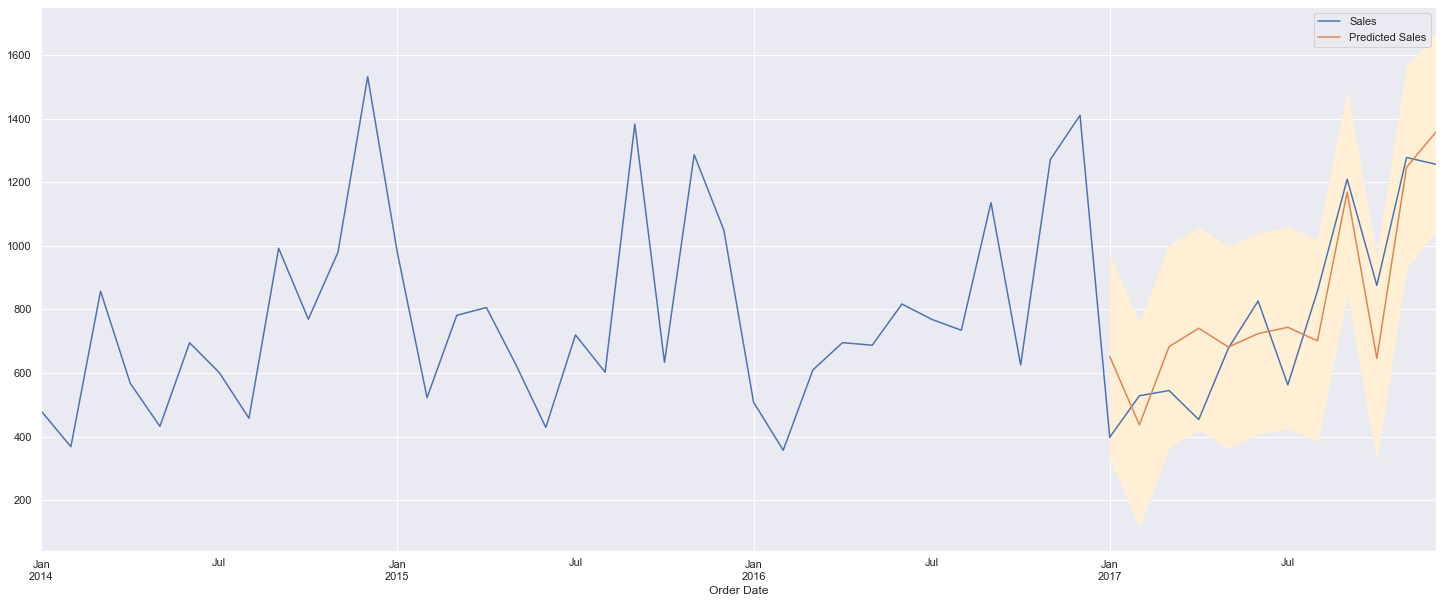

In [71]:
pred = result.get_prediction(start = "01-01-2017")
pred_ci = pred.conf_int()
ax = y.plot(figsize = (25,10), label = "Actual Sales")
pred.predicted_mean.plot(ax=ax , label = "Predicted Sales")
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0], pred_ci.iloc[:,1], color = "#FFEFD5")
plt.legend()
plt.show()

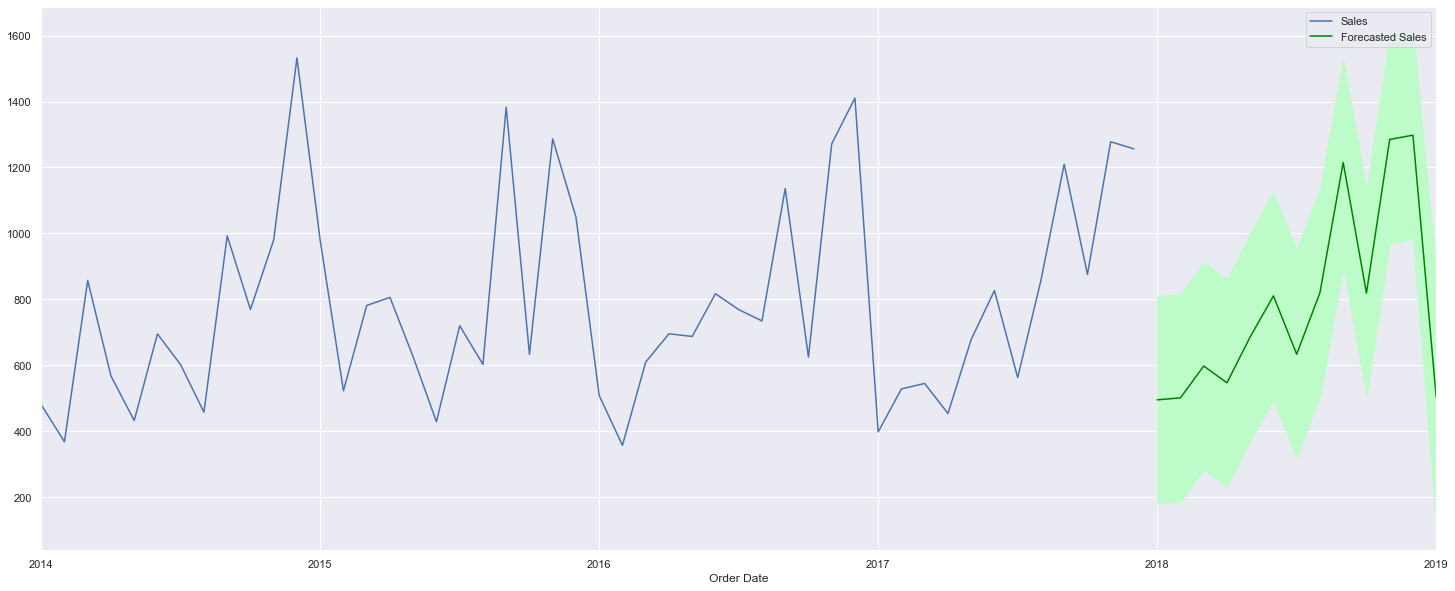

In [73]:
fore = result.get_forecast(steps= 13)
fore_ci = fore.conf_int()
ax = y.plot(figsize = (25,10), label = "Actual Sales")
fore.predicted_mean.plot(ax =ax, color = "green", label = "Forecasted Sales")
ax.fill_between(fore_ci.index, fore_ci.iloc[:,0], fore_ci.iloc[:,1],color = "#BDFCC9" )
plt.legend()
plt.show()

## Conclusion

We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for furniture sales in the superstore. The sales for furniture increases linearly over time.